In [1]:
#@title Load Metadata of LUDB (CSV)
import pandas as pd

LUDB_BASEPATH = 'lobachevsky-university-electrocardiography-database-1.0.1'
LUDB_CSV_PATH = f'{LUDB_BASEPATH}/ludb.csv'

df = pd.read_csv(LUDB_CSV_PATH)

display(df)

,ID,Sex,Age,Rhythms,Electric axis of the heart,Conduction abnormalities,Extrasystolies,Hypertrophies,Cardiac pacing,Ischemia,Non-specific repolarization abnormalities,Other states
0,1,F\n,51\n,Sinus bradycardia,Electric axis of the heart: left axis deviation,NaN,NaN,Left ventricular overload\nLeft ventricular hy...,NaN,NaN,Non-specific repolarization abnormalities: pos...,NaN
1,2,M\n,64\n,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,NaN,Non-specific repolarization abnormalities: pos...,NaN
2,3,M\n,53\n,Sinus rhythm,Electric axis of the heart: vertical,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Ischemia: inferior wall\nIschemia: lateral wall,NaN,NaN
3,4,M\n,56\n,Sinus rhythm,Electric axis of the heart: left axis deviation,Incomplete right bundle branch block,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Ischemia: inferior wall\nScar formation: infer...,NaN,NaN
4,5,M\n,61\n,Sinus rhythm,Electric axis of the heart: horizontal,NaN,NaN,Left atrial hypertrophy,NaN,NaN,Non-specific repolarization abnormalities: inf...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,F\n,63\n,Sinus rhythm,Electric axis of the heart: horizontal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,NaN,Non-specific repolarization abnormalities: ant...,NaN
196,197,F\n,34\n,Sinus arrhythmia,Electric axis of the heart: normal,NaN,NaN,Right atrial overload,NaN,NaN,NaN,NaN
197,198,F\n,38\n,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,199,F\n,34\n,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#@title Select Interested Column Only (ID, Rhythms)

df = df[['ID', 'Rhythms']]

display(df)

,ID,Rhythms
0,1,Sinus bradycardia
1,2,Sinus rhythm
2,3,Sinus rhythm
3,4,Sinus rhythm
4,5,Sinus rhythm
...,...,...
195,196,Sinus rhythm
196,197,Sinus arrhythmia
197,198,Sinus rhythm
198,199,Sinus rhythm


In [3]:
#@title Show Unique Rhythms
df['Rhythms'].value_counts()

Rhythms
Sinus rhythm                                     142
Sinus bradycardia                                 24
Atrial fibrillation                               14
Sinus arrhythmia                                   7
Sinus tachycardia                                  4
Atrial flutter, typical                            3
Irregular sinus rhythm                             2
Atrial fibrillation\nAberrant conduction           1
Sinus bradycardia\nWandering atrial pacemaker      1
Sinus rhythm\nWandering atrial pacemaker           1
Sinus arrhythmia\nWandering atrial pacemaker       1
Name: count, dtype: int64

In [4]:
#@title Normalize Multiple Rhythms

# Filter string if containg newline, any string after newline is removed
df['Rhythms'] = df['Rhythms'].str.replace(r'\n.*', '', regex=True)

# Show unique
df['Rhythms'].value_counts()

Rhythms
Sinus rhythm               143
Sinus bradycardia           25
Atrial fibrillation         15
Sinus arrhythmia             8
Sinus tachycardia            4
Atrial flutter, typical      3
Irregular sinus rhythm       2
Name: count, dtype: int64

In [5]:
#@title Load a Random Metada ECG Record
import os
import wfdb

# Lead indexer
lead_names = ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']

# Randomly select a record
record = df['ID'].sample().values[0]

# File path
LUDB_DATA_PATH = os.path.join(LUDB_BASEPATH, 'data')
record_path = os.path.join(LUDB_DATA_PATH, str(record))

# load amplitude
signals, fields = wfdb.rdsamp(record_path)

# load delineation annotation
ann_samples = []
ann_symbols = []
for l in lead_names:
  ann = wfdb.rdann(record_path, extension=l)
  ann_samples.append(ann.sample)
  ann_symbols.append(ann.symbol)

print('Signal:', type(signals), signals.shape, signals.dtype)
print()

for key, value in fields.items():
  print(key, value)
print()

print('Annotation:', len(ann_samples), len(ann_symbols))

Signal: <class 'numpy.ndarray'> (5000, 12) float64

fs 500
sig_len 5000
n_sig 12
base_date None
base_time None
units ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV']
sig_name ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']
comments ['<age>: 34', '<sex>: M', '<diagnoses>:', 'Rhythm: Sinus bradycardia.', 'Electric axis of the heart: normal.', 'Incomplete right bundle branch block.']

Annotation: 12 12


In [6]:
#@title Symbol-Sample to Densed Representation
import numpy as np

# Remapper b->0, N->1, t->2, p->3: This is same as Entities in the context of Named Entity Recognition
mapper = {
  'b': 0, # Baseline
  'N': 1, # QRS
  't': 2, # T
  'p': 3  # P
}

# 12-lead delineation annotator
delineation = []
for lead_idx in range(12):

  label_encoded = []
  labeler = 'b' # baseline
  k = 0
  for i in range(fields['sig_len']):
    if i in ann_samples[lead_idx]:
      labeler = ann_symbols[lead_idx][k]
      if labeler == '(': # onset
        j = k
        labeler = ann_symbols[lead_idx][j]
        while labeler == '(' or labeler == ')':
          j += 1
          labeler = ann_symbols[lead_idx][j]
      elif labeler == ')': # offset
        labeler = 'b'

      k += 1

    label_encoded.append(mapper[labeler])

  delineation.append(label_encoded)

delineation = np.array(delineation).astype(np.uint8)

print(delineation[0])

[0 0 0 ... 0 0 0]


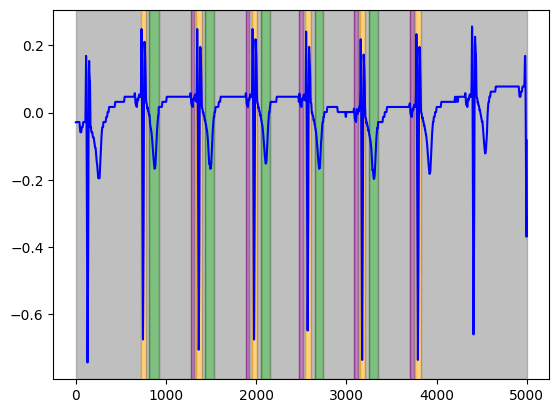

In [7]:
#@title Plot the Example of Signal and Delineation in a Rhythm
from visualizer import plot_delineation

lead_idx = 7
plot_delineation(signals[:, lead_idx], delineation[lead_idx])

In [8]:
#@title Iterate for all Records for Symbol-Sample to Densed Representation

filename = 'ludb_delineation_raw.pkl'

if not os.path.exists(filename):

  data_to_collect = dict()
  for record in df['ID']:
    
    # File path
    record_path = os.path.join(LUDB_DATA_PATH, str(record))

    # load amplitude
    signals, fields = wfdb.rdsamp(record_path)

    # load delineation annotation
    ann_samples = []
    ann_symbols = []
    for l in lead_names:
      ann = wfdb.rdann(record_path, extension=l)
      ann_samples.append(ann.sample)
      ann_symbols.append(ann.symbol)
    
    # 12-lead delineation annotator
    delineation = []
    for lead_idx in range(12):

      label_encoded = []
      labeler = 'b' # baseline
      k = 0
      for i in range(fields['sig_len']):
        if i in ann_samples[lead_idx]:
          labeler = ann_symbols[lead_idx][k]
          if labeler == '(': # onset
            j = k
            labeler = ann_symbols[lead_idx][j]
            while labeler == '(' or labeler == ')':
              j += 1
              try:
                labeler = ann_symbols[lead_idx][j]
              except Exception as e: # Unknow error, sometimes index out of range
                print('Error:', e, 'at', record, lead_idx, i, j)
                break
          elif labeler == ')': # offset
            labeler = 'b'

          k += 1

        try:
          label_encoded.append(mapper[labeler])
        except:
          label_encoded.append(0)

      delineation.append(label_encoded)
    delineation = np.array(delineation).astype(np.uint8)

    data_to_collect[record] = {
      'signals': signals,
      'fields': fields,
      'delineation': delineation
    }

In [9]:
#@title Save the Symbol-Sample to Densed Representation in a Pickle File
import pickle

# # save
# with open('ludb_delineation_raw.pkl', 'wb') as f:
#   pickle.dump(data_to_collect, f)

# load
with open('ludb_delineation_raw.pkl', 'rb') as f: # still float64
  ludb_delineation_raw = pickle.load(f)

In [10]:
#@title Batching Data for Denoiser Inference

filename = 'ludb_delineation_raw_batched.npz'
if not os.path.exists(filename):
  id_ref = []
  amplitude_tensor = []
  delineation_tensor = []

  for record, data in ludb_delineation_raw.items():
    amplitude = []
    delineation = []
    for lead_idx in range(12):
      s = data['signals'][:, lead_idx]
      d = data['delineation'][lead_idx]

      amplitude.append(s)
      delineation.append(d)

    id_ref.append(record)  
    amplitude_tensor.append(amplitude)
    delineation_tensor.append(delineation)

  id_ref = np.array(id_ref)
  amplitude_tensor = np.array(amplitude_tensor)
  delineation_tensor = np.array(delineation_tensor)

  amplitude_tensor.shape, delineation_tensor.shape, id_ref.shape, amplitude_tensor.dtype, delineation_tensor.dtype

In [11]:
#@title Save Batched Tensor

# Save npz
# np.savez('ludb_delineation_raw_batched.npz', id_ref=id_ref, amplitude_tensor=amplitude_tensor, delineation_tensor=delineation_tensor)

# Laod back
data = np.load('ludb_delineation_raw_batched.npz')
id_ref = data['id_ref']
amplitude_tensor = data['amplitude_tensor']
delineation_tensor = data['delineation_tensor']

id_ref.shape, amplitude_tensor.shape, delineation_tensor.shape

((200,), (200, 12, 5000), (200, 12, 5000))

# All Preprocessor Function

In [ ]:
#@title Preprocess Utils
from keras.api import ops
from denoiser_model import get_denoiser

def resample(signal, annotation, current_sample_rate, desired_sample_rate):
  """
  Resample the signal and annotation to the desired sample rate.

  Args:
    signal (np.ndarray): The ECG signal with shape (batch_size, signal_length).
    annotation (np.ndarray): The ECG annotation with shape (batch_size, signal_length).
    current_sample_rate (uint): The current sample rate of the signal and annotation.
    desired_sample_rate (uint): The desired sample rate of the signal and annotation.

  Returns:
    np.ndarray: The resampled signal with shape (batch_size, resampled_length).
    np.ndarray: The resampled annotation with shape (batch_size, resampled_length).
  """
  # check type
  assert isinstance(signal, np.ndarray), "signal must be a numpy array"
  
  # checkk if scalar
  assert isinstance(current_sample_rate, int), "current_sample_rate must be an integer"
  assert isinstance(desired_sample_rate, int), "desired_sample_rate must be an integer"

  # check dims
  assert signal.ndim == 2, "signal must have 2 dimensions which are (batch_size, signal_length)"
  assert annotation.ndim == 2, "annotation must have 2 dimensions which are (batch_size, signal_length)"

  # is downsample or upsample?
  ratio = desired_sample_rate / current_sample_rate
  if ratio < 1:
    # downsample
    resampled_indices = np.round(np.arange(0, signal.shape[-1], 1/ratio)).astype(int)
    resampled_indices = np.clip(resampled_indices, 0, signal.shape[-1] - 1) # make sure indices are within the bounds of the original array
    resampled_signal = signal[:, resampled_indices] 
    resampled_annotation = annotation[:, resampled_indices]
  elif ratio > 1:
    # upsample
    resampled_indices = np.arange(0, signal.shape[-1], 1/ratio)
    resampled_indices = np.clip(resampled_indices, 0, signal.shape[-1] - 1) # make sure indices are within the bounds of the original array
    resampled_signal = np.array([np.interp(resampled_indices, np.arange(signal.shape[-1]), s) for s in signal])
    resampled_annotation = np.array([np.interp(resampled_indices, np.arange(annotation.shape[-1]), a) for a in annotation])
  else:
    # same sample rate
    resampled_signal = signal
    resampled_annotation = annotation
  
  return resampled_signal.astype(float), np.round(resampled_annotation).astype(int)

def perform_bw_denoising(signal, sample_rate):
  """
  Perform baseline wander denoising to the signal. Note, the signal must be 360Hz sample rate.

  Args:
    signal (np.ndarray): The ECG signal with shape (batch_size, signal_length).
    sample_rate (uint): The sample rate of the signal.

  Returns:
    denoised_signal (np.ndarray): The denoised signal with shape (batch_size, signal_length).
  """
  
  # check type
  assert isinstance(signal, np.ndarray), "signal must be a numpy array"

  # checkk if scalar
  assert isinstance(sample_rate, int), "sample_rate must be an integer"

  # check dims
  assert signal.ndim == 2, "signal must have 2 dimensions which are (batch_size, signal_length)"

  # check sample rate
  assert sample_rate == 360, "sample_rate must be 360Hz"

  # add channel for model input compatibility
  signal = signal[:, :, np.newaxis]

  # to keras tensor
  signal = ops.convert_to_tensor(signal, dtype='float64')

  # instantiate denoiser
  denoiser = get_denoiser(signal_size=signal.shape[1])

  # perform actual denoising
  denoised_signal = denoiser.predict(signal)

  # remove channel dimension
  denoised_signal = denoised_signal[:, :, 0]

  return denoised_signal

def padding(signal, annotation):
  """
  Pad the signal and annotation. This is specific function for LUDB dataset where the signal and annotation are not annotated at the beginning and the end.

  Args:
    signal (np.ndarray: uint): The ECG signal with shape (batch_size, signal_length).
    annotation (np.ndarray: uint): The ECG annotation with shape (batch_size, signal_length).

  Returns:
    padded_signal (np.ndarray: uint): The padded signal with shape (batch_size, signal_length).
    padded_annotation (np.ndarray: uint): The padded annotation with shape (batch_size, signal_length).
  """

  # check type
  assert isinstance(signal, np.ndarray), "signal must be a numpy array"
  assert isinstance(annotation, np.ndarray), "annotation must be a numpy array"

  # check dims
  assert signal.ndim == 2, "signal must have 2 dimensions which are (batch_size, signal_length)"
  assert annotation.ndim == 2, "annotation must have 2 dimensions which are (batch_size, signal_length)"

  signal_padded = signal.copy()
  annotation_padded = annotation.copy()

  # Find first non-zero index from left (axis=1)
  first_nonzero_from_left = np.argmax(annotation > 0, axis=1)

  # Find first non-zero index from right (axis=1)
  first_nonzero_from_right = signal.shape[-1] - 1 - np.argmax(annotation[:, ::-1] > 0, axis=1)

  # Create a range array for the signal length
  range_array = np.arange(annotation.shape[-1])

  # Masks for left and right
  mask_left = range_array < first_nonzero_from_left[:, None]
  mask_right = range_array > first_nonzero_from_right[:, None]

  # Apply masks to diffed_resampled
  signal_padded[mask_left] = 0
  signal_padded[mask_right] = 0

  # Pad the annotation_resampled for padding regions
  annotation_padded[mask_left] = 4
  annotation_padded[mask_right] = 4

  return signal_padded, annotation_padded.astype(np.uint32)

def ieee754_to_signedint(x, b=7, axis=None):
  """
  Convert IEEE 754 floating point to signed integer.

  Args:
    x (np.ndarray): The IEEE 754 floating point with shape (batch_size, signal_length).
    b (int): The number of bits for the signed integer.
    axis (int): The axis to perform the operation. If None, the reference is the entire array. If axis=-1, the reference is the local vector.

  Returns:
    y (np.ndarray): The signed integer with shape (batch_size, signal_length).
  """
  
  m = np.max(np.abs(x), axis=axis, keepdims=True)
  m[m==0] = 1

  y = (2**b - 1 * (x > 0)) * x / m
  return y.astype(np.uint64)

In [14]:
#@title Preprocess all Batched Data

# Reshaping for preprocess compatibility
original_shape = amplitude_tensor.shape
a_ori, b_ori = amplitude_tensor.reshape(-1, 5000), delineation_tensor.reshape(-1, 5000)

# Preprocess pipeline
a_360, b_360 = resample(a_ori, b_ori, 500, 360) # old_sample_rate: 500 | new_sample_rate: 360 | This is for denoised model compatibiility where it learns
a_360_denoised = perform_bw_denoising(a_360, 360)
a_360_denoised_80, b_360_80 = resample(a_360_denoised, b_360, 360, 80) # old_sample_rate: 360 | new_sample_rate: 80 | This is domain specific for ECG that has 40 Hz freq
a_360_denoised_80_padded, b_360_80_padded = padding(a_360_denoised_80, b_360_80)
a_360_denoised_80_padded_requantized = (ieee754_to_signedint(a_360_denoised_80_padded, b=7, axis=-1) + 128).astype(np.uint8)

# override padded class into baseline class: 4 -> 0
b_360_80_padded[b_360_80_padded == 4] = 0

# Reshape back like input
def reshaper(vec):
  return vec.reshape((original_shape[0], original_shape[1], vec.shape[-1]))

a_ori, b_ori = reshaper(a_ori), reshaper(b_ori)
a_360, b_360 = reshaper(a_360), reshaper(b_360)
a_360_denoised = reshaper(a_360_denoised)
a_360_denoised_80, b_360_80 = reshaper(a_360_denoised_80), reshaper(b_360_80)
a_360_denoised_80_padded, b_360_80_padded = reshaper(a_360_denoised_80_padded), reshaper(b_360_80_padded)
a_360_denoised_80_padded_requantized = reshaper(a_360_denoised_80_padded_requantized)

75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 219ms/step


Record: 164
 Lead: avf


Original 500Hz


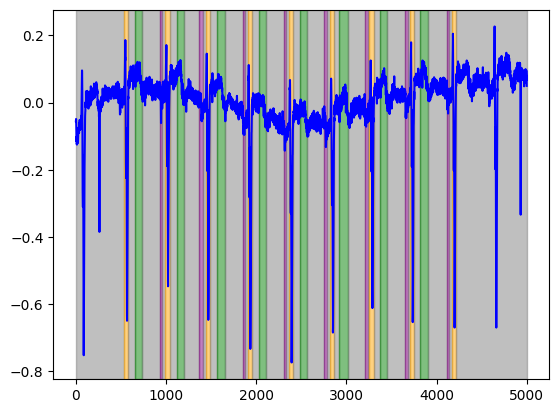

Original 500Hz -> 360Hz Downsample


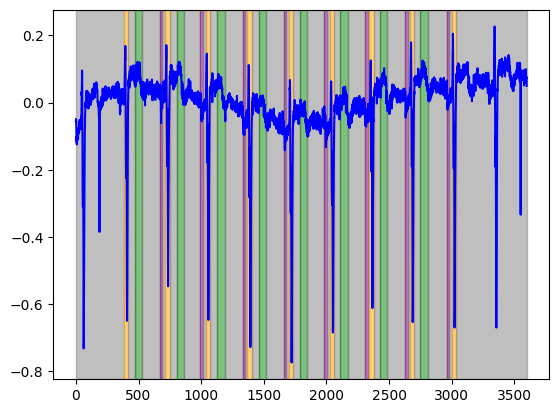

Original 500Hz -> 360Hz Downsample -> Denoised Baseline Wander


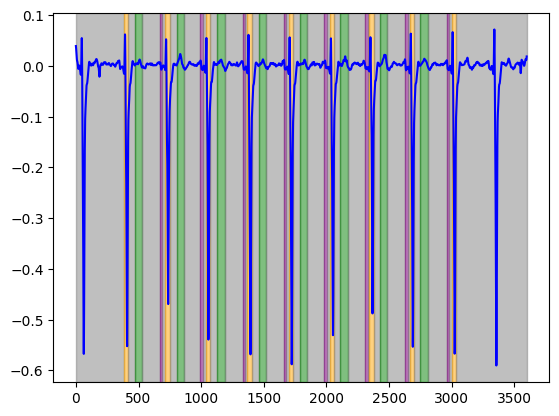

Original 500Hz -> 360Hz Downsample -> Denoised Baseline Wander -> 80Hz Downsample


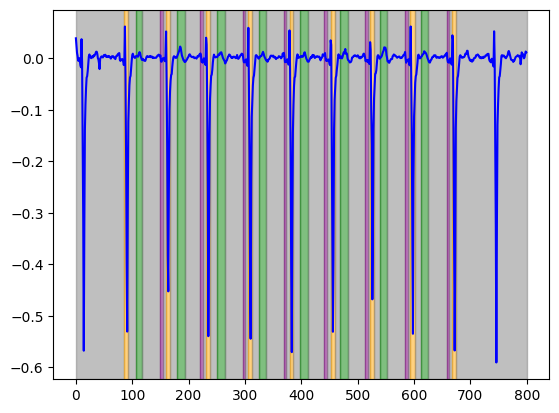

Original 500Hz -> 360Hz Downsample -> Denoised Baseline Wander -> 80Hz Downsample -> Padded


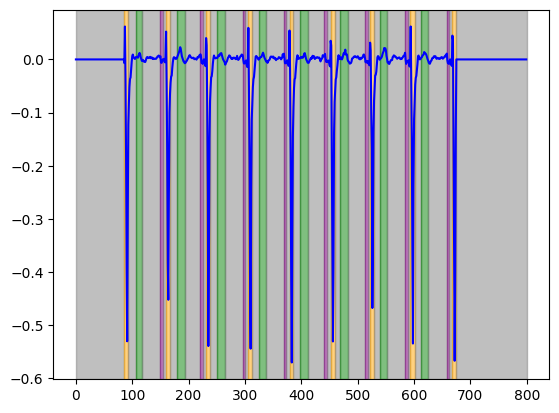

Original 500Hz -> 360Hz Downsample -> Denoised Baseline Wander -> 80Hz Downsample -> Padded -> Requantized


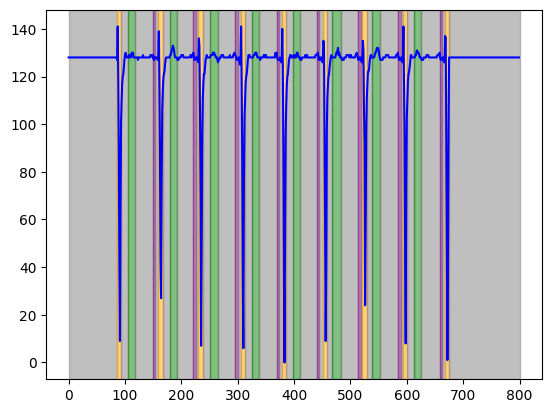

In [15]:
#@title Random Plot

record_id = np.random.randint(len(id_ref))
lead_id = np.random.randint(12)

# zoom plot range
rndm = np.random.randint(0, 10)
start_sec = rndm
end_sec = rndm+2

# Print metadata
print(
  f"Record: {id_ref[record_id]}\n",
  f"Lead: {lead_names[lead_id]}\n"
)
print()

# plot entire signal
print("Original 500Hz")
plot_delineation(a_ori[record_id, lead_id, :], b_ori[record_id, lead_id, :])
print("Original 500Hz -> 360Hz Downsample")
plot_delineation(a_360[record_id, lead_id, :], b_360[record_id, lead_id, :])
print("Original 500Hz -> 360Hz Downsample -> Denoised Baseline Wander")
plot_delineation(a_360_denoised[record_id, lead_id, :], b_360[record_id, lead_id, :])
print("Original 500Hz -> 360Hz Downsample -> Denoised Baseline Wander -> 80Hz Downsample")
plot_delineation(a_360_denoised_80[record_id, lead_id, :], b_360_80[record_id, lead_id, :])
print("Original 500Hz -> 360Hz Downsample -> Denoised Baseline Wander -> 80Hz Downsample -> Padded")
plot_delineation(a_360_denoised_80_padded[record_id, lead_id, :], b_360_80_padded[record_id, lead_id, :])
print("Original 500Hz -> 360Hz Downsample -> Denoised Baseline Wander -> 80Hz Downsample -> Padded -> Requantized")
plot_delineation(a_360_denoised_80_padded_requantized[record_id, lead_id, :], b_360_80_padded[record_id, lead_id, :])


In [16]:
#@title Train Validation Split based on Rhythm
possible_rhythms = list(df['Rhythms'].unique())

num_to_take = 2
val_id_ref = []

# non-atrial
for rhy in possible_rhythms:
  sampled = df[df["Rhythms"] == rhy].sample(num_to_take, random_state=42)
  for s in sampled["ID"].values:
    val_id_ref.append(s)

val_id_ref = np.array(val_id_ref)

train_id_ref = np.setdiff1d(id_ref, val_id_ref)

print(train_id_ref, val_id_ref)

df[df['ID'].isin(val_id_ref)].reset_index(drop=True)


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  27  28  29  30  31  32  33  34  36  37  38
  39  40  41  42  43  44  45  46  48  49  50  51  53  54  55  56  57  58
  59  60  61  62  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 102 103 104 105 106 107 109 111 112 113 115 116 117
 118 119 120 121 122 123 124 125 126 127 129 130 131 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 167 168 169 170 171 172 173 174
 175 176 177 179 180 181 182 183 184 185 186 187 189 190 191 192 193 194
 195 196 197 198 199 200] [ 47 128 166  26 101 110  63 178  35  52 114 188 132 108]


,ID,Rhythms
0,26,Sinus rhythm
1,35,"Atrial flutter, typical"
2,47,Sinus bradycardia
3,52,"Atrial flutter, typical"
4,63,Sinus arrhythmia
5,101,Atrial fibrillation
6,108,Irregular sinus rhythm
7,110,Atrial fibrillation
8,114,Sinus tachycardia
9,128,Sinus bradycardia


In [17]:
#@title Construct Train Validation Data
preprocessed_signal = a_360_denoised_80_padded_requantized.copy()
preprocessed_annotation = b_360_80_padded.copy()

X_train = preprocessed_signal[np.isin(id_ref, train_id_ref), :,:]
y_train = preprocessed_annotation[np.isin(id_ref, train_id_ref), :,:]

X_val = preprocessed_signal[np.isin(id_ref, val_id_ref), :,:]
y_val = preprocessed_annotation[np.isin(id_ref, val_id_ref), :,:]

# show shape
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((186, 12, 800), (186, 12, 800), (14, 12, 800), (14, 12, 800))

In [49]:
#@title Windowing Every 3 seconds
from numpy.lib.stride_tricks import sliding_window_view

# windowing
window_size = 256

X_train_windowed = sliding_window_view(X_train.ravel(), window_shape=(window_size), axis=-1)
y_train_windowed = sliding_window_view(y_train.ravel(), window_shape=(window_size), axis=-1)

X_val_windowed = np.pad(X_val.ravel(), (0, window_size - X_val.ravel().shape[-1] % window_size), mode='constant', constant_values=128).reshape(-1, window_size)
y_val_windowed = np.pad(y_val.ravel(), (0, window_size - y_val.ravel().shape[-1] % window_size), mode='constant', constant_values=0).reshape(-1, window_size)

X_train_windowed.shape, y_train_windowed.shape, X_val_windowed.shape, y_val_windowed.shape

((1785345, 256), (1785345, 256), (526, 256), (526, 256))

Window: 15290



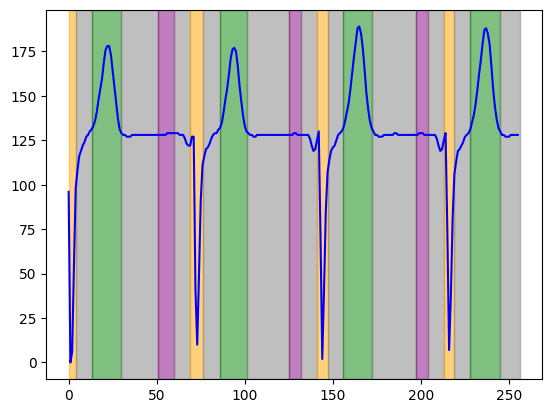

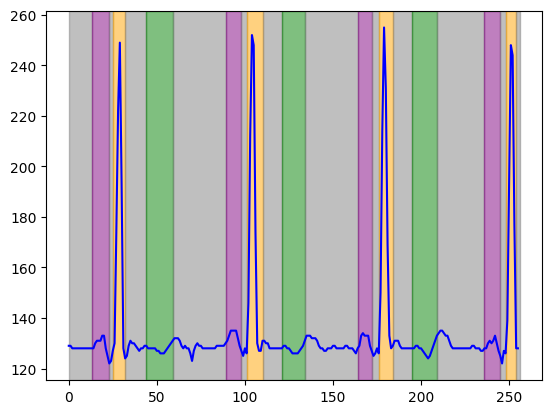

In [55]:
#@title Random Plot of Windowed Data

window_id: int = np.random.randint(X_train_windowed.shape[0])

# Print metadata
print(
  f"Window: {window_id}\n"
)

plot_delineation(X_train_windowed[window_id], y_train_windowed[window_id])
plot_delineation(X_val_windowed[window_id%X_val_windowed.shape[0]], y_val_windowed[window_id%X_val_windowed.shape[0]])

In [56]:
#@title Vocabulary Size of Amplitude and Annotation
VOCAB_SIZE_AMP = np.max(X_train).astype(np.uint16) + 1
VOCAB_SIZE_ANN = np.max(y_train).astype(np.uint16) + 1

VOCAB_SIZE_AMP, VOCAB_SIZE_ANN

(np.uint16(256), np.uint16(4))

# Summary

In [92]:
"""
Preprocessing Summary

1. Load the metadata of LUDB from CSV file
2. Select the ID and Rhythms columns
3. Normalize the Rhythm names removing multiple rhythms and only selecting the first one such as removing `wandering atrial pacemaker` and only selecting `atrial fibrillation`
4. Load the LUDB records and annotations
5. Index integer representations of delineation from WFDB annotation, such as `N` for normal beat, converting symbol-index into densed representation for every points in the signal.
6. Load denoiser the signal using pretrained model for baseline wander removal (Deep Filter).
7. For every record and lead that has been flattened into batch dimension, preprocess the signal and annotation using the following pipeline:
  - Resample the signal and annotation to 360Hz.
  - Perform baseline wander denoising using Deep Filter.
  - Resample the denoised signal and annotation to 80Hz.
  - Pad the signal and annotation, removing unannotated amplitude. (preprocessing specific for LUDB)
  - Amplitude tokenization to signed integer by IEEE 754 floating point conversion and adding 128 to make it unsigned integer, so the range is 0-255.
  - Convert to unsigned integer by adding 127. This is for model compatibility and treat as tokenized input.
8. Split the data into train and val based on the unique rhythms.
9. Construct the train and test data into windowed 3-seconds window, the train using sliding window view and test using reshape.
10. The vocabulary size of amplitude and annotation is calculated by taking the maximum value and adding 1.
"""

'\nPreprocessing Summary\n\n1. Load the metadata of LUDB from CSV file\n2. Select the ID and Rhythms columns\n3. Normalize the Rhythm names removing multiple rhythms and only selecting the first one such as removing `wandering atrial pacemaker` and only selecting `atrial fibrillation`\n4. Load the LUDB records and annotations\n5. Index integer representations of delineation from WFDB annotation, such as `N` for normal beat, converting symbol-index into densed representation for every points in the signal.\n6. Load denoiser the signal using pretrained model for baseline wander removal (Deep Filter).\n7. For every record and lead that has been flattened into batch dimension, preprocess the signal and annotation using the following pipeline:\n  - Resample the signal and annotation to 360Hz.\n  - Perform baseline wander denoising using Deep Filter.\n  - Resample the denoised signal and annotation to 80Hz.\n  - Pad the signal and annotation, removing unannotated amplitude. (preprocessing sp

In [57]:
#@title Save Preprocessed Data
import numpy as np

# save (casting them into uint8 to reduce memory usage because none of them exceed 255)
filename = 'ludb_preprocessed_80hz_256winsize.npz'
# np.savez_compressed(
#   filename,
#   X_train=X_train_windowed.astype(np.uint8),
#   y_train=y_train_windowed.astype(np.uint8),
#   X_val=X_val_windowed.astype(np.uint8),
#   y_val=y_val_windowed.astype(np.uint8),
#   train_id_ref=train_id_ref.astype(np.uint8),
#   val_id_ref=val_id_ref.astype(np.uint8),
#   train_window_shape_ref=np.array(X_train.shape, dtype=np.uint16),
#   val_window_shape_ref=np.array(X_val.shape, dtype=np.uint16),
#   id_ref=id_ref.astype(np.uint8)
#   )

# load back
data = np.load(filename)
# perform load back
X_train_windowed = data['X_train']
y_train_windowed = data['y_train']
X_val_windowed = data['X_val']
y_val_windowed = data['y_val']
train_id_ref = data['train_id_ref']
val_id_ref = data['val_id_ref']
train_window_shape_ref = data['train_window_shape_ref']
val_window_shape_ref = data['val_window_shape_ref']
id_ref = data['id_ref']

# print shape and dtype
print("X_train_windowed shape:", X_train_windowed.shape, "dtype:", X_train_windowed.dtype)
print("y_train_windowed shape:", y_train_windowed.shape, "dtype:", y_train_windowed.dtype)
print("X_val_windowed shape:", X_val_windowed.shape, "dtype:", X_val_windowed.dtype)
print("y_val_windowed shape:", y_val_windowed.shape, "dtype:", y_val_windowed.dtype)
print("train_id_ref shape:", train_id_ref.shape, "dtype:", train_id_ref.dtype)
print("val_id_ref shape:", val_id_ref.shape, "dtype:", val_id_ref.dtype)
print("train_window_shape_ref shape:", train_window_shape_ref.shape, "dtype:", train_window_shape_ref.dtype)
print("val_window_shape_ref shape:", val_window_shape_ref.shape, "dtype:", val_window_shape_ref.dtype)
print("id_ref shape:", id_ref.shape, "dtype:", id_ref.dtype)

X_train_windowed shape: (1785345, 256) dtype: uint8
y_train_windowed shape: (1785345, 256) dtype: uint8
X_val_windowed shape: (526, 256) dtype: uint8
y_val_windowed shape: (526, 256) dtype: uint8
train_id_ref shape: (186,) dtype: uint8
val_id_ref shape: (14,) dtype: uint8
train_window_shape_ref shape: (3,) dtype: uint16
val_window_shape_ref shape: (3,) dtype: uint16
id_ref shape: (200,) dtype: uint8


Window: 1631454



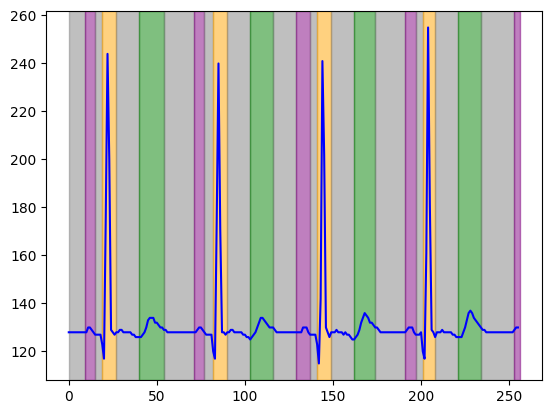

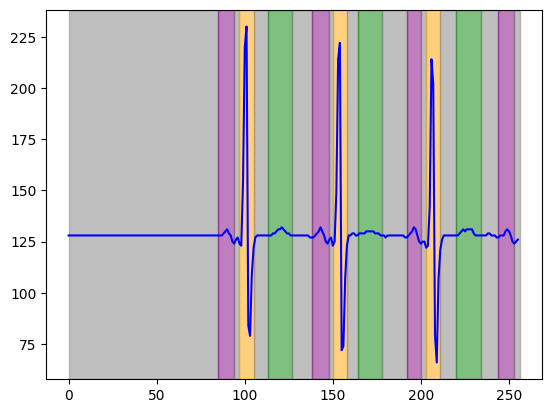

In [79]:
#@title Random Plot of Windowed Data to Verify loaded data
from visualizer import plot_delineation

window_id: int = np.random.randint(X_train_windowed.shape[0])

# Print metadata
print(
  f"Window: {window_id}\n"
)

plot_delineation(X_train_windowed[window_id], y_train_windowed[window_id])
plot_delineation(X_val_windowed[window_id%X_val_windowed.shape[0]], y_val_windowed[window_id%X_val_windowed.shape[0]])